## Serial LETK Filtering


In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter
import ETKalmanFilter
import SLETKalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [3]:
obs_timestamp = "2021_08_11-14_10_37"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


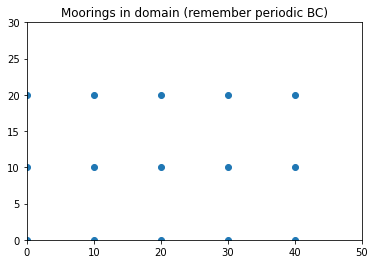

In [4]:
observation.plot_positions()

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [5]:
prior_args = Statistics.prior_args_from_file(timestamp)

## Kalman filtering

Updating/conditioning the distributions at every observation time

Please remember to set priors!


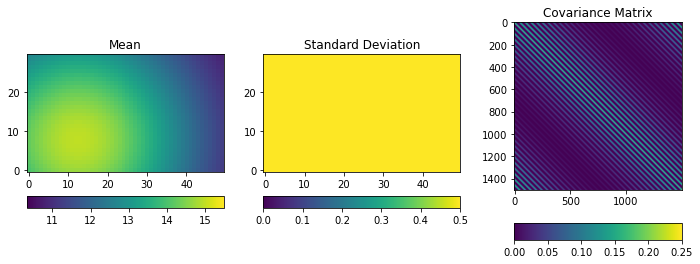

In [6]:
statistics_kf = Statistics.Statistics(simulator)
statistics_kf.set_prior(prior_args)

statistics_kf.plot()

0


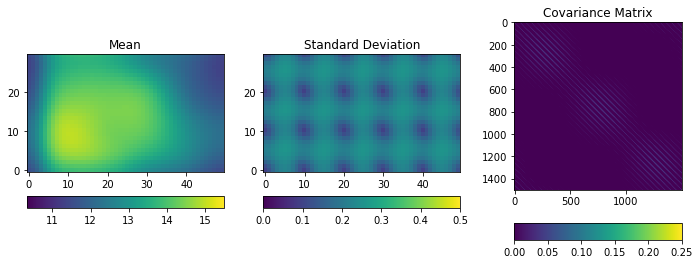

1


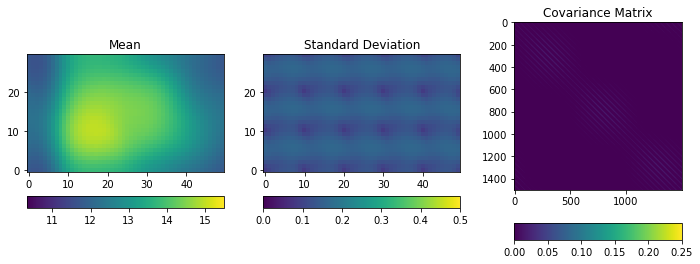

2


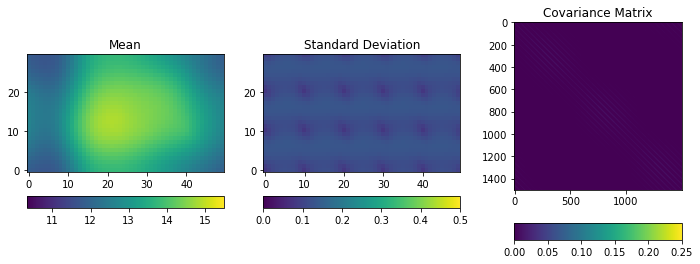

3


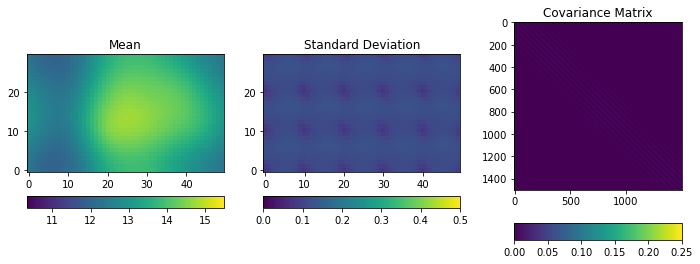

4


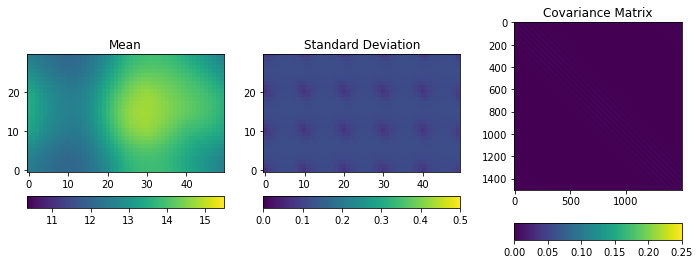

5


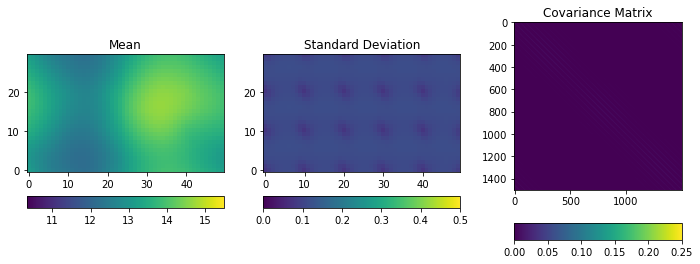

6


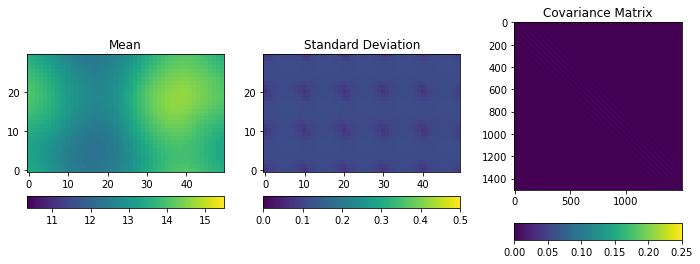

7


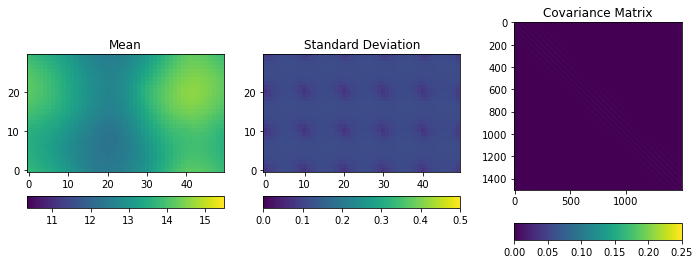

8


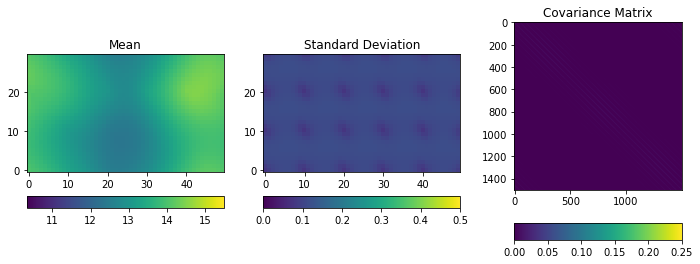

9


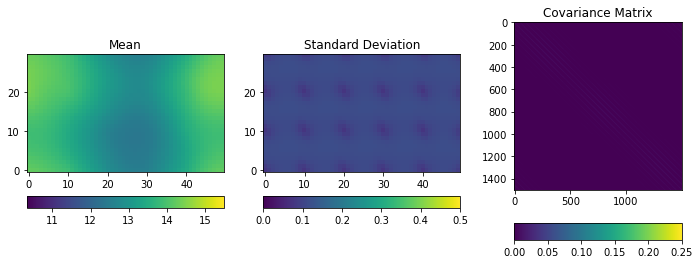

In [7]:
kalmanFilter = KalmanFilter.Kalman(statistics_kf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_kf.propagate(25)
    kalmanFilter.filter(statistics_kf.mean, statistics_kf.cov, observation.obses[t])
    statistics_kf.plot()

## ETKF filtering

Updating/conditioning the distributions at every observation time

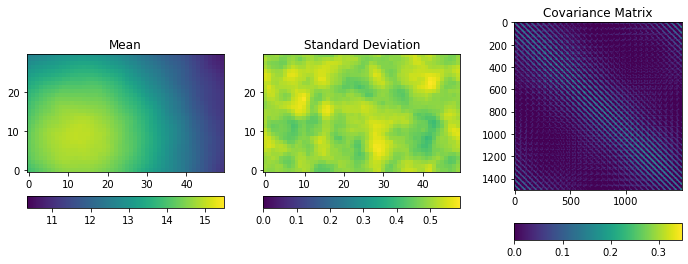

In [8]:
statistics_etkf = Statistics.Statistics(simulator, 100)
statistics_etkf.set_prior(prior_args)

statistics_etkf.plot()

0


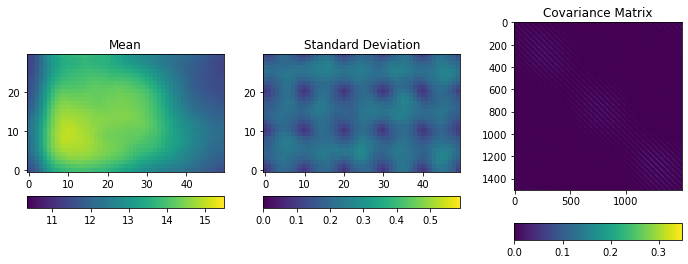

1


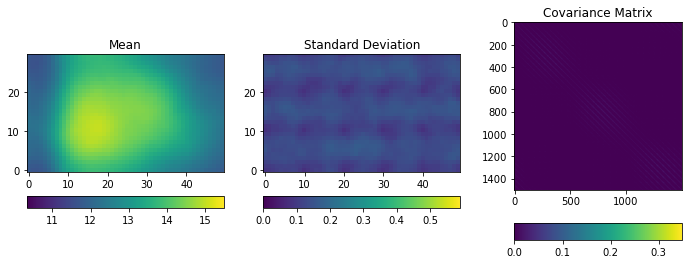

2


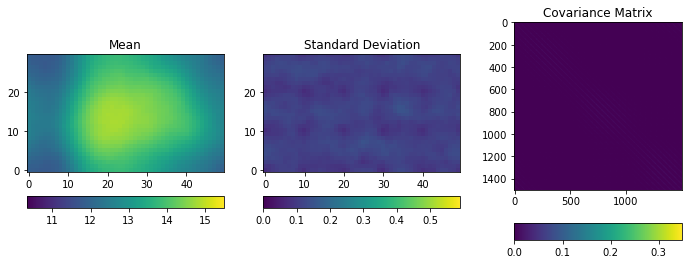

3


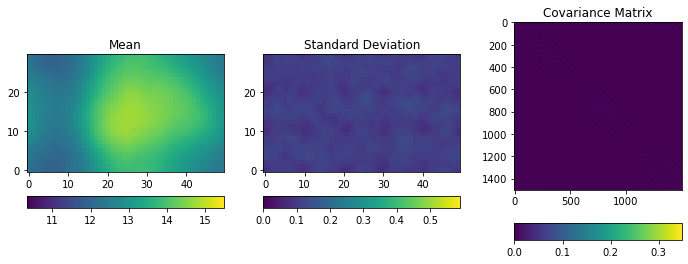

4


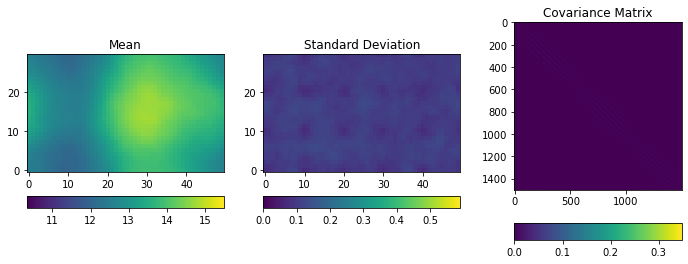

5


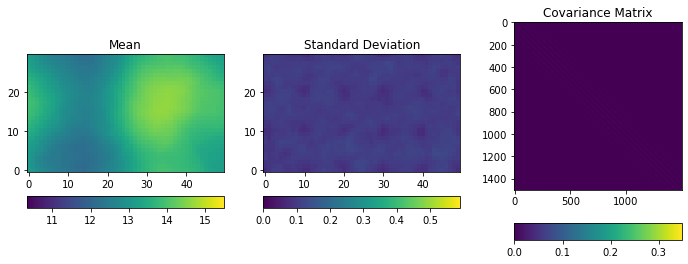

6


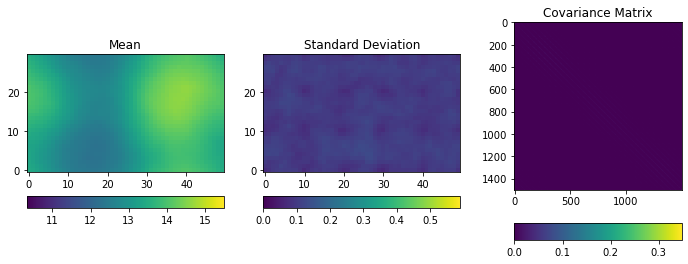

7


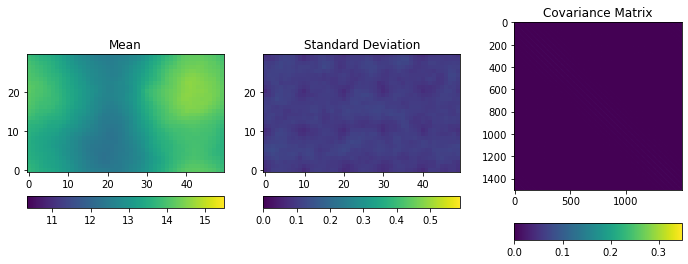

8


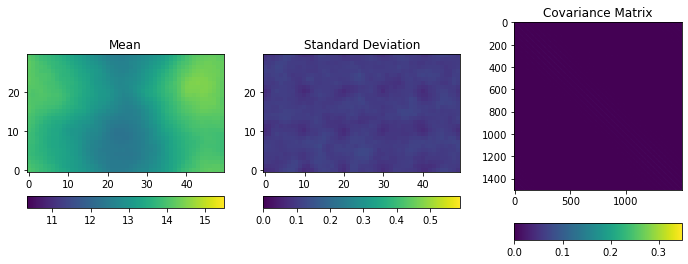

9


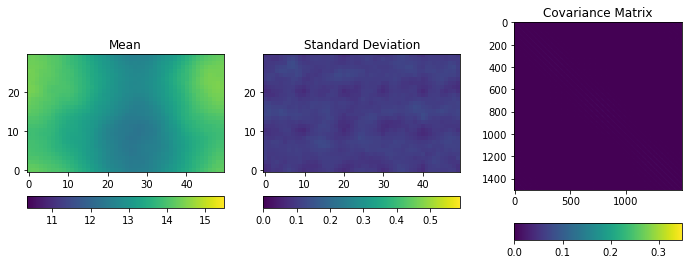

In [9]:
etkFilter = ETKalmanFilter.ETKalman(statistics_etkf, observation)

for t in range(observation.N_obs):
    print(t)
    statistics_etkf.propagate(25)
    etkFilter.filter(statistics_etkf.ensemble.ensemble, observation.obses[t])
    statistics_etkf.plot()

## LETKF filtering

Updating/conditioning the distributions at every observation time

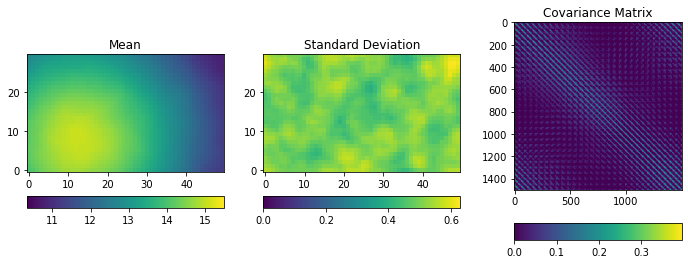

In [10]:
statistics_letkf = Statistics.Statistics(simulator, 100)
statistics_letkf.set_prior(prior_args)

statistics_letkf.plot()

In [11]:
# We choose the scale_r as about 2/3 of the correlation length in grid cells 
scale_r = 8

In [12]:
sletkFilter = SLETKalmanFilter.SLETKalman(statistics_letkf, observation, scale_r)

In [13]:
sletkFilter.groups

[[0, 2, 6, 8, 14], [1, 4, 5, 7, 13], [11, 3, 9], [10, 12]]

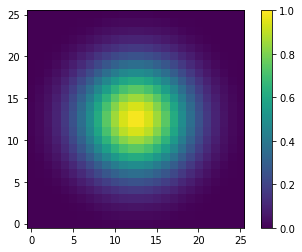

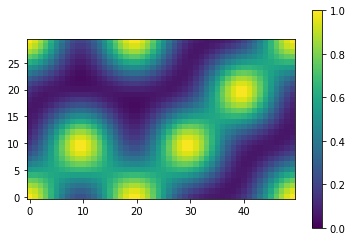

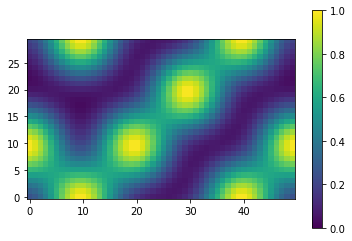

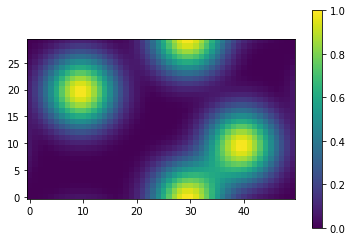

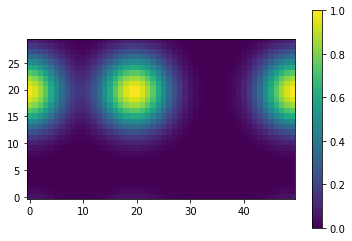

In [14]:
from matplotlib import pyplot as plt
plt.imshow(sletkFilter.W_loc, origin="lower", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()
for g in range(len(sletkFilter.groups)):
    plt.imshow(sletkFilter.W_analyses[g], origin="lower", vmin=0.0, vmax=1.0)
    plt.colorbar()
    plt.show()

0


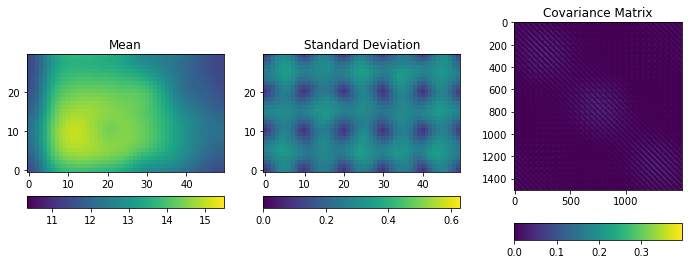

1


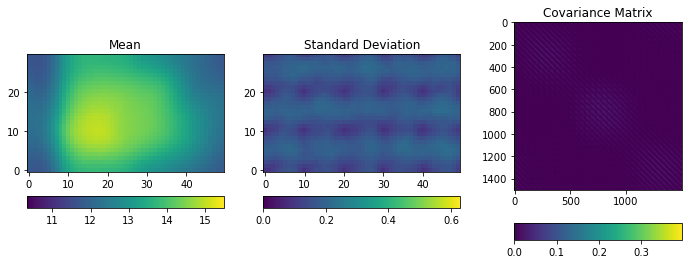

2


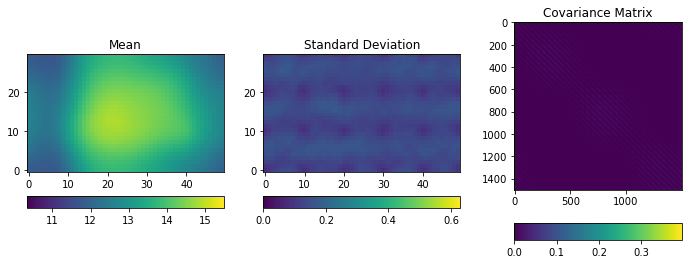

3


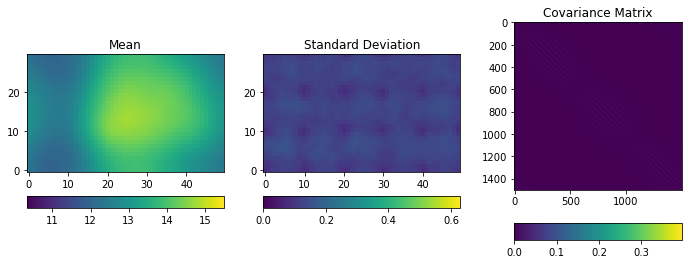

4


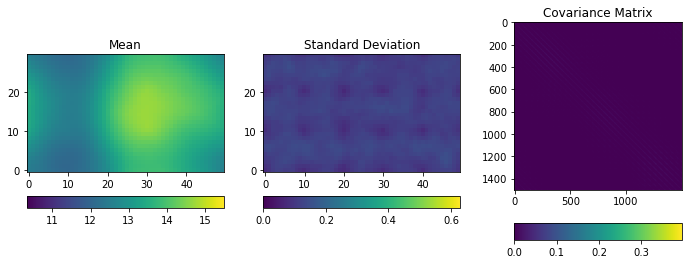

5


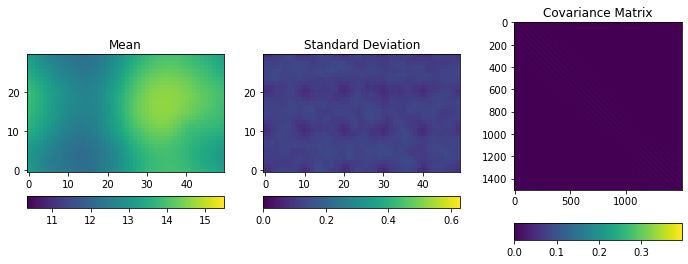

6


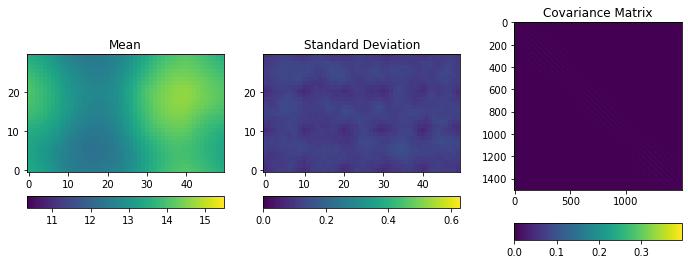

7


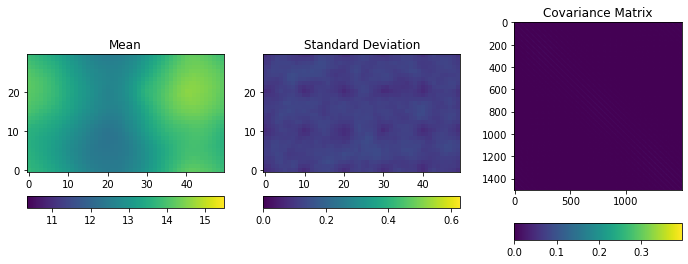

8


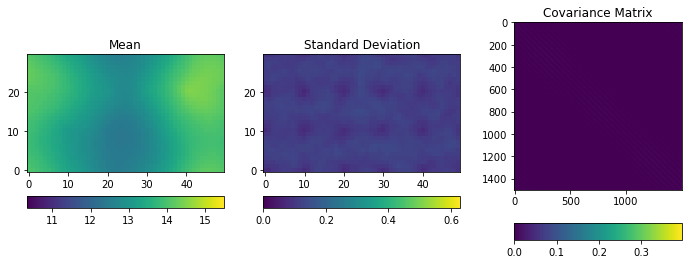

9


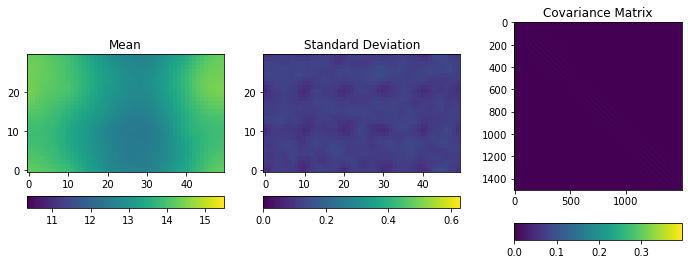

In [15]:
for t in range(observation.N_obs):
    print(t)
    statistics_letkf.propagate(25)
    sletkFilter.filter(statistics_letkf.ensemble.ensemble, observation.obses[t])
    statistics_letkf.plot()

## Comparison

In [16]:
import scipy.stats

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import numpy as np

from statsmodels.distributions.empirical_distribution import ECDF


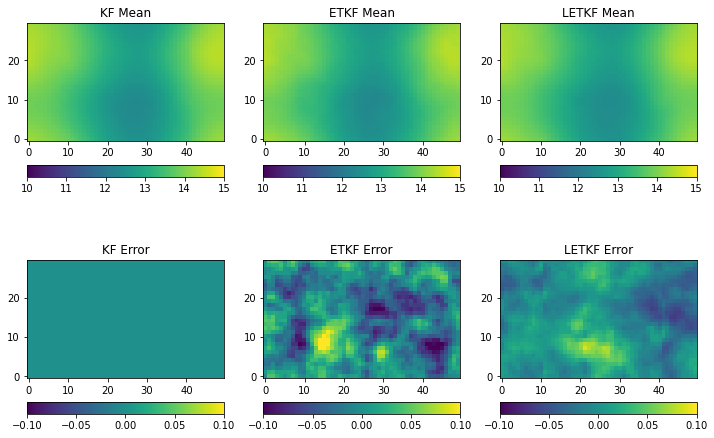

In [18]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

fig00 = axs[0,0].imshow(np.reshape(statistics_kf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
axs[0,0].set_title("KF Mean")
ax_divider = make_axes_locatable(axs[0,0])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig00, cax=ax_cb, orientation="horizontal")

fig01 = axs[0,1].imshow(np.reshape(statistics_etkf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
axs[0,1].set_title("ETKF Mean")
ax_divider = make_axes_locatable(axs[0,1])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig01, cax=ax_cb, orientation="horizontal")

fig02 = axs[0,2].imshow(np.reshape(statistics_letkf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
axs[0,2].set_title("LETKF Mean")
ax_divider = make_axes_locatable(axs[0,2])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig02, cax=ax_cb, orientation="horizontal")

mean_err_kf = np.reshape(statistics_kf.mean, (grid.ny, grid.nx))-np.reshape(statistics_kf.mean, (grid.ny, grid.nx))

fig10 = axs[1,0].imshow(mean_err_kf, origin = "lower", vmin=-0.1, vmax=0.1)
axs[1,0].set_title("KF Error")
ax_divider = make_axes_locatable(axs[1,0])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig10, cax=ax_cb, orientation="horizontal")

mean_err_etkf = np.reshape(statistics_etkf.mean, (grid.ny, grid.nx))-np.reshape(statistics_kf.mean, (grid.ny, grid.nx))

fig11 = axs[1,1].imshow(mean_err_etkf, origin = "lower", vmin=-0.1, vmax=0.1)
axs[1,1].set_title("ETKF Error")
ax_divider = make_axes_locatable(axs[1,1])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig11, cax=ax_cb, orientation="horizontal")

mean_err_letkf = np.reshape(statistics_letkf.mean, (grid.ny, grid.nx))-np.reshape(statistics_kf.mean, (grid.ny, grid.nx))

fig12 = axs[1,2].imshow(mean_err_letkf, origin = "lower", vmin=-0.1, vmax=0.1)
axs[1,2].set_title("LETKF Error")
ax_divider = make_axes_locatable(axs[1,2])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig12, cax=ax_cb, orientation="horizontal")

plt.show()

In [19]:
print("RMSE of KF = ", np.sum(mean_err_kf**2))
print("RMSE of ETKF = ", np.sum(mean_err_etkf**2))
print("RMSE of LETKF = ", np.sum(mean_err_letkf**2))

RMSE of KF =  0.0
RMSE of ETKF =  2.0790538310487046
RMSE of LETKF =  0.9048284187261738


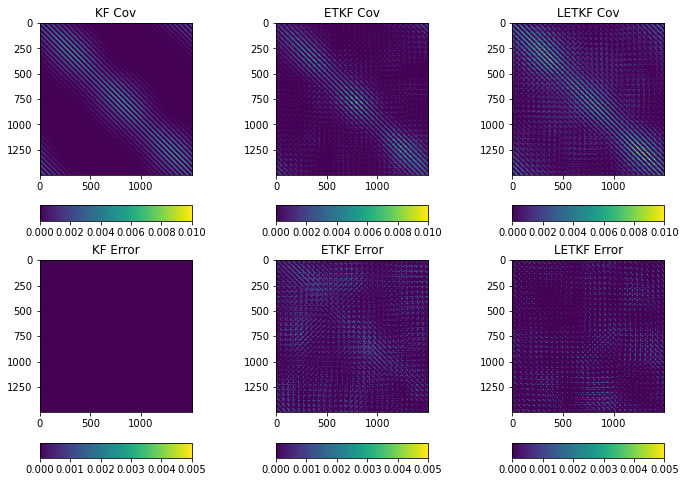

In [20]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

fig00 = axs[0,0].imshow(statistics_kf.cov,vmin=0, vmax=0.01)
axs[0,0].set_title("KF Cov")
ax_divider = make_axes_locatable(axs[0,0])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig00, cax=ax_cb, orientation="horizontal")

fig01 = axs[0,1].imshow(statistics_etkf.cov,vmin=0, vmax=0.01)
axs[0,1].set_title("ETKF Cov")
ax_divider = make_axes_locatable(axs[0,1])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig01, cax=ax_cb, orientation="horizontal")

fig02 = axs[0,2].imshow(statistics_letkf.cov,vmin=0, vmax=0.01)
axs[0,2].set_title("LETKF Cov")
ax_divider = make_axes_locatable(axs[0,2])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig02, cax=ax_cb, orientation="horizontal")

fig10 = axs[1,0].imshow(statistics_kf.cov-statistics_kf.cov,vmin=0, vmax=0.005)
axs[1,0].set_title("KF Error")
ax_divider = make_axes_locatable(axs[1,0])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig10, cax=ax_cb, orientation="horizontal")

fig11 = axs[1,1].imshow(statistics_kf.cov-statistics_etkf.cov,vmin=0, vmax=0.005)
axs[1,1].set_title("ETKF Error")
ax_divider = make_axes_locatable(axs[1,1])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig11, cax=ax_cb, orientation="horizontal")

fig12 = axs[1,2].imshow(statistics_kf.cov-statistics_letkf.cov,vmin=0, vmax=0.005)
axs[1,2].set_title("LETKF Error")
ax_divider = make_axes_locatable(axs[1,2])
ax_cb = ax_divider.append_axes("bottom", size="10%", pad="20%")
plt.colorbar(fig12, cax=ax_cb, orientation="horizontal")

plt.show()

In [21]:
print("Frobenius error in Cov matrix (KF) = ", np.linalg.norm(statistics_kf.cov - statistics_kf.cov))
print("Frobenius error in Cov matrix (ETKF) = ", np.linalg.norm(statistics_kf.cov - statistics_etkf.cov))
print("Frobenius error in Cov matrix (LETKF) = ", np.linalg.norm(statistics_kf.cov - statistics_letkf.cov))

Frobenius error in Cov matrix (KF) =  0.0
Frobenius error in Cov matrix (ETKF) =  1.637497344437489
Frobenius error in Cov matrix (LETKF) =  2.051893482131359


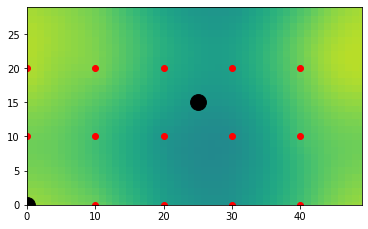

In [22]:
interest1 = np.zeros((grid.ny,grid.nx))
interest1[0,0] = 1.0
idx1 = np.where(interest1.flatten() != 0 )[0][0]

interest2 = np.zeros((grid.ny,grid.nx))
interest2[15,25] = 1.0
idx2 = np.where(interest2.flatten() != 0 )[0][0]

plt.imshow(np.reshape(statistics_kf.mean, (grid.ny, grid.nx)), origin = "lower", vmin=10, vmax=15)
plt.scatter(observation.positions[:,0],observation.positions[:,1], c="red")
plt.xlim(0, grid.nx-1)
plt.ylim(0, grid.ny-1)

plt.scatter(np.where(interest1 != 0)[1][0], np.where(interest1 != 0 )[0][0], c="black", s=250)
plt.scatter(np.where(interest2 != 0)[1][0], np.where(interest2 != 0 )[0][0], c="black", s=250)

plt.show()

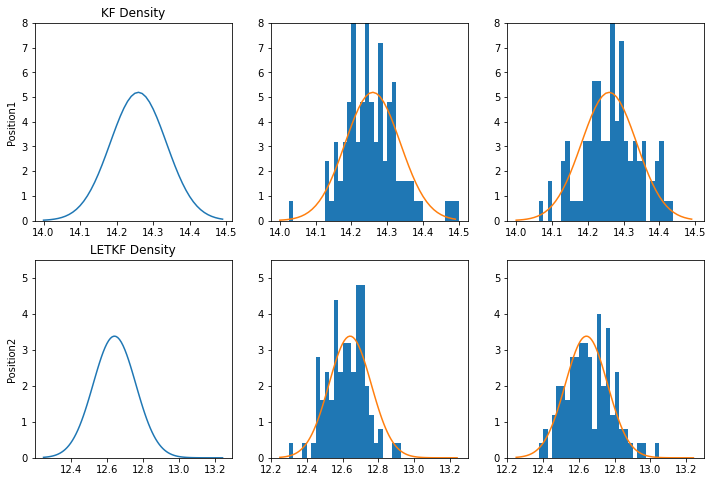

In [23]:
min1 = 14.0
max1 = 14.5

x1 = np.arange(min1,max1,0.01)
density1 = scipy.stats.norm.pdf(x1, loc=statistics_kf.mean[idx1], scale=statistics_kf.stddev[idx1])

fig, axs = plt.subplots(2,3, figsize=(12,8))

axs[0,0].plot(x1, density1)
axs[0,0].set_title("KF Density")
axs[0,0].set_ylabel("Position1")
axs[0,0].set_ylim([0.0,8.0])

axs[0,1].hist(statistics_etkf.ensemble.ensemble[idx1,:], density=True, bins=40, range=(min1,max1))
axs[0,1].plot(x1, density1)
axs[1,0].set_title("ETKF Density")
axs[0,1].set_ylim([0.0,8.0])

axs[0,2].hist(statistics_letkf.ensemble.ensemble[idx1,:], density=True, bins=40, range=(min1,max1))
axs[0,2].plot(x1, density1)
axs[1,0].set_title("LETKF Density")
axs[0,2].set_ylim([0.0,8.0])



min2 = 12.25
max2 = 13.25

x2 = np.arange(min2,max2,0.01)
density2 = scipy.stats.norm.pdf(x2, loc=statistics_kf.mean[idx2], scale=statistics_kf.stddev[idx2])

axs[1,0].plot(x2, density2)
axs[1,0].set_title("KF Density")
axs[1,0].set_ylabel("Position2")
axs[1,0].set_ylim([0.0,5.5])

axs[1,1].hist(statistics_etkf.ensemble.ensemble[idx2,:], density=True, bins=40, range=(min2,max2))
axs[1,1].plot(x2, density2)
axs[1,0].set_title("ETKF Density")
axs[1,1].set_ylim([0.0,5.5])

axs[1,2].hist(statistics_letkf.ensemble.ensemble[idx2,:], density=True, bins=40, range=(min2,max2))
axs[1,2].plot(x2, density2)
axs[1,0].set_title("LETKF Density")
axs[1,2].set_ylim([0.0,5.5])

plt.show()


In [32]:
cdf1 = lambda x: scipy.stats.norm.cdf(x, loc=statistics_kf.mean[idx1], scale=statistics_kf.stddev[idx1])
cdf2 = lambda x: scipy.stats.norm.cdf(x, loc=statistics_kf.mean[idx2], scale=statistics_kf.stddev[idx2])

In [33]:
ecdf1_etkf = ECDF(statistics_etkf.ensemble.ensemble[idx1,:])
ecdf2_etkf = ECDF(statistics_etkf.ensemble.ensemble[idx2,:])

ecdf1_letkf = ECDF(statistics_letkf.ensemble.ensemble[idx1,:])
ecdf2_letkf = ECDF(statistics_letkf.ensemble.ensemble[idx2,:])

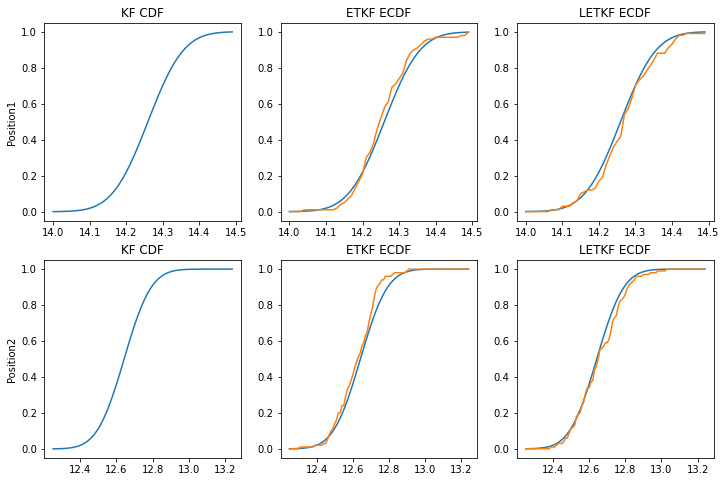

In [34]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

axs[0,0].plot(x1, cdf1(x1))
axs[0,0].set_title("KF CDF")
axs[0,0].set_ylabel("Position1")

axs[0,1].plot(x1, cdf1(x1))
axs[0,1].plot(x1, ecdf1_etkf(x1))
axs[0,1].set_title("ETKF ECDF")

axs[0,2].plot(x1, cdf1(x1))
axs[0,2].plot(x1, ecdf1_letkf(x1))
axs[0,2].set_title("LETKF ECDF")

axs[1,0].plot(x2, cdf2(x2))
axs[1,0].set_title("KF CDF")
axs[1,0].set_ylabel("Position2")

axs[1,1].plot(x2, cdf2(x2))
axs[1,1].plot(x2, ecdf2_etkf(x2))
axs[1,1].set_title("ETKF ECDF")

axs[1,2].plot(x2, cdf2(x2))
axs[1,2].plot(x2, ecdf2_letkf(x2))
axs[1,2].set_title("LETKF ECDF")

plt.show()

In [36]:
diff1_etkf = lambda x: abs(cdf1(x)-ecdf1_etkf(x))
diff2_etkf = lambda x: abs(cdf2(x)-ecdf2_etkf(x))

diff1_letkf = lambda x: abs(cdf1(x)-ecdf1_letkf(x))
diff2_letkf = lambda x: abs(cdf2(x)-ecdf2_letkf(x))

print("Difference at pos1 (ETKF) = ", scipy.integrate.quad(diff1_etkf, min1, max1, limit=100)[0])
print("Difference at pos1 (LETKF) = ", scipy.integrate.quad(diff1_letkf, min1, max1, limit=100)[0])
print("Difference at pos2 (ETKF) = ", scipy.integrate.quad(diff2_etkf, min2, max2, limit=100)[0])
print("Difference at pos2 (LETKF) = ", scipy.integrate.quad(diff2_letkf, min2, max2, limit=100)[0])

<ipython-input-36-fd850543dca0>:7: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("Difference at pos1 (ETKF) = ", scipy.integrate.quad(diff1_etkf, min1, max1, limit=100)[0])


Difference at pos1 (ETKF) =  0.011961858617171162


<ipython-input-36-fd850543dca0>:8: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("Difference at pos1 (LETKF) = ", scipy.integrate.quad(diff1_letkf, min1, max1, limit=100)[0])


Difference at pos1 (LETKF) =  0.010473320914088645


<ipython-input-36-fd850543dca0>:9: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("Difference at pos2 (ETKF) = ", scipy.integrate.quad(diff2_etkf, min2, max2, limit=100)[0])


Difference at pos2 (ETKF) =  0.022438745403488464
Difference at pos2 (LETKF) =  0.01712730070245387


<ipython-input-36-fd850543dca0>:10: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("Difference at pos2 (LETKF) = ", scipy.integrate.quad(diff2_letkf, min2, max2, limit=100)[0])
